In [1185]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 25
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 82
np.random.seed(12345)

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [1186]:
import numpy as np
import pandas as pd

In [1187]:
# pandas uses the floating-point value NaN (Not a Number) to represent missing data
# Step 1: Create a dataset
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [1188]:
# Step 2: Check if there is NaN
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [1189]:
string_data = pd.Series(["aardvark", np.nan, None, "avocado"])
string_data


0    aardvark
1         NaN
2        None
3     avocado
dtype: object

In [1190]:
string_data.isna()


0    False
1     True
2     True
3    False
dtype: bool

In [1191]:
float_data = pd.Series([1, 2, None], dtype='float64')
float_data


0    1.0
1    2.0
2    NaN
dtype: float64

In [1192]:
float_data.isna()

0    False
1    False
2     True
dtype: bool

In [1193]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data


0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [1194]:
# Step 4: dropna by default drops any row containing a missing value
data.dropna()
data
print(data.dropna())

0    1.0
2    3.5
4    7.0
dtype: float64


In [1195]:
# Step 5: include the not nan values
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [1196]:
# How about all nan
# Step 6: create a new dataframe
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.],[np.nan, np.nan, np.nan]])
data


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0
4,NaN,NaN,NaN


In [1197]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [1198]:
# Step 7: Passing how="all" will drop only rows that are all NA
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [1199]:
# Step 8: create a new column and assign np.nan
data[4] = np.nan
data


,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN
4,NaN,NaN,NaN,NaN


In [1200]:
# Step 9: To drop columns in the same way, pass axis="columns"
data.dropna(axis="columns", how="all")
copy=data.dropna(axis="columns", how="all")
print(copy)
copy.dropna(axis="index", how="all")

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0
4  NaN  NaN  NaN


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [1201]:
# Step 10: keep only rows containing at most a certain number of missing observations
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df


,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [1202]:
# Step 11: specifies the minimum number of non-null values a row must have to be retained
df.dropna(thresh=3)

,0,1,2
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [1203]:
df.dropna()


,0,1,2
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [1204]:
# Step 11: specifies the minimum number of non-null values a row must have to be retained
df.dropna(thresh=3)

,0,1,2
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [1205]:
# Filling in Missing Data
# Step 12: fillna method to replace missing values
df.fillna(0)

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [1206]:
# Step 13: fill value for specific column
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.204708,0.500000,0.000000
1,-0.555730,0.500000,0.000000
2,0.092908,0.500000,0.769023
3,1.246435,0.500000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [1207]:
# forward fill
df = pd.DataFrame(np.random.standard_normal((6, 3)))
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df


,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,NaN,1.343810
3,-0.713544,NaN,-2.370232
4,-1.860761,NaN,NaN
5,-1.265934,NaN,NaN


In [1208]:
# Step 14: method "ffill"
df.fillna(method="ffill")


C:\Users\anton\AppData\Local\Temp\ipykernel_20400\500814160.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,0.124121,-2.370232
5,-1.265934,0.124121,-2.370232


In [1209]:
df.fillna(method="ffill", limit=2)

C:\Users\anton\AppData\Local\Temp\ipykernel_20400\1627181726.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", limit=2)


,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,NaN,-2.370232
5,-1.265934,NaN,-2.370232


In [1210]:
# Step 15: simple data imputation using mean
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data.fillna(data.mean())
# aplly it to the dataframe
new_Data=data.fillna(data.mean())
print(new_Data)
print(data)


0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64
0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64


In [1211]:
# Data Transformation
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [1212]:
# Step 1: # check duplicates
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [1213]:
# Step 2: # remove duplicates
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [1214]:
# Step 3: filter duplicates based only on the "k1" column
data["v1"] = range(7)
data


,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [1215]:
data.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [1216]:
# Step 4: drop_duplicates by default keep the first observed value combination. Passing keep="last" will return the last one
data.drop_duplicates(["k1", "k2"], keep="last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [1217]:
# Transforming Data using a function or mapping
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                              "pastrami", "corned beef", "bacon",
                              "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [1218]:
meat_to_animal = {
  "bacon": "pig",
  "pulled pork": "pig",
  "pastrami": "cow",
  "corned beef": "cow",
  "honey ham": "pig",
  "nova lox": "salmon"
}


In [1219]:
# Map meat to animal
data["animal"] = data["food"].map(meat_to_animal)

# Build a mask: True for rows that are NOT pig
mask = ~data["animal"].str.contains("pig", case=False, na=False)

# Apply the mask to the whole DataFrame
new_data = data[mask]          # or data[mask].copy() if you want a copy

print(data)       # full data
print("\n")
print(new_data)   # same columns, but without pig rows

          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     pastrami     6.0     cow
4  corned beef     7.5     cow
5        bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


          food  ounces  animal
3     pastrami     6.0     cow
4  corned beef     7.5     cow
6     pastrami     3.0     cow
8     nova lox     6.0  salmon


In [1220]:

data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [1221]:
# Step 2: passed a function
def get_animal(x):
    return meat_to_animal[x]
data["food"].map(get_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [1222]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [1223]:
# Replacing Values
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [1224]:
df=pd.DataFrame({""
"fruit":["apple","banana","pear","banana","kiwi","apple","banana"]
})
print(df)
fruit_color={
"apple":"red",
"banana":"yellow",
"pear":"green",
"kiwi":"brown"
}
df["color"]=df["fruit"].map(fruit_color)
print(df)



    fruit
0   apple
1  banana
2    pear
3  banana
4    kiwi
5   apple
6  banana
    fruit   color
0   apple     red
1  banana  yellow
2    pear   green
3  banana  yellow
4    kiwi   brown
5   apple     red
6  banana  yellow


In [1225]:
# Step 1: replace provides a simpler and more flexible way
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [1226]:
# Step 2: replace multiple values at once,
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [1227]:
# Step 3: use a different replacement for each value
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [1228]:
# Step 4: argument passed can also be a dictionary
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [1229]:
# Renaming Axis Indexes
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=["Ohio", "Colorado", "New York"],
                    columns=["one", "two", "three", "four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [1230]:
# Step 1: define a funciton to do the mapping
def transform(x):
    return x[:4].upper()

data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [1231]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [1232]:
# Discretization and Binning
# Continuous data is often discretized or otherwise separated into “bins” for analysis
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [1233]:
# Step 1: divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older
bins = [18, 25, 35, 60, 100]
# Step 2: pandas.cut
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [1234]:
age_categories.codes


array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [1235]:
age_categories.categories


IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [1236]:
age_categories.categories[0]


Interval(18, 25, closed='right')

In [1237]:
# Step 3: pandas.value_counts(categories) are the bin counts for the result of pandas.cut.
pd.value_counts(age_categories)

C:\Users\anton\AppData\Local\Temp\ipykernel_20400\3325439714.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(age_categories)


(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: count, dtype: int64

In [1238]:
# Step 4: override the default interval-based bin labeling by passing a list or array to the labels option
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

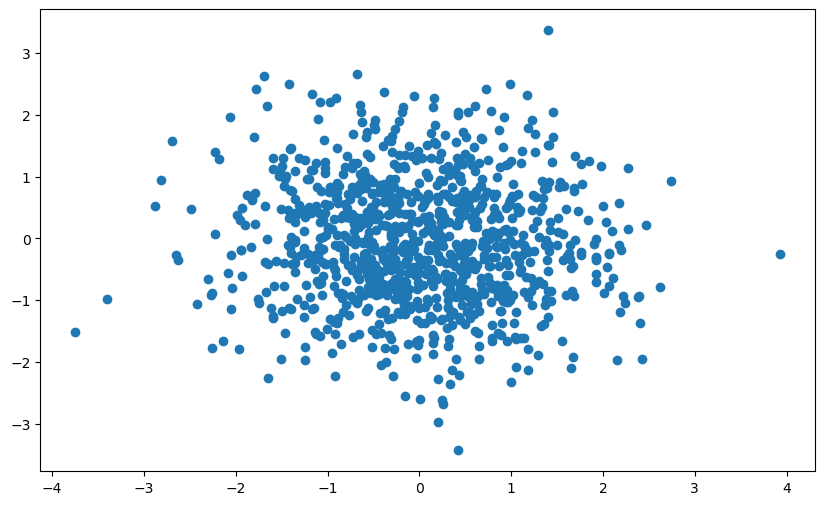

In [1239]:
# Detecting and Filtering Outliers
# Step 1: random.standard_normal(): This function generates samples from a standard normal distribution, 
# which has a mean of 0 and a standard deviation of 1
data = pd.DataFrame(np.random.standard_normal((1000, 4)))
data.describe()
plt.scatter(data[0], data[1])


In [1240]:
# Step 2: find values in one of the columns exceeding 3 in absolute value
col = data[2]
col[col.abs() > 3]

798   -3.548824
Name: 2, dtype: float64

In [1241]:
# Step 3: select all rows having a value exceeding 3 or –3,
data[(data.abs() > 3).any(axis="columns")]

,0,1,2,3
88,3.927528,-0.255126,0.854137,-0.364807
92,0.194788,-0.655054,-0.565230,3.176873
296,-3.399312,-0.974657,-0.685312,-0.645858
314,-0.817649,0.050188,1.951312,3.260383
391,-3.745356,-1.520113,-0.346839,-0.696918
489,-1.341493,-0.293333,-0.242459,-3.056990
513,0.425384,-3.428254,-0.296336,-0.439938
576,-0.085420,0.275144,1.179227,-3.184377
798,-0.150923,-0.362528,-3.548824,1.553205
890,1.397822,3.366626,-2.372214,0.851010


In [1242]:
# Permutation and Random Sampling

df = pd.DataFrame(np.arange(35).reshape((5, 7)))
df



,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [1243]:
# Step 1: using the numpy.random.permutation function
sampler = np.random.permutation(5)
sampler

array([2, 1, 4, 3, 0], dtype=int32)

In [1244]:
# Step 2: apply the sampler to the dataset
df.take(sampler)


,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13
4,28,29,30,31,32,33,34
3,21,22,23,24,25,26,27
0,0,1,2,3,4,5,6


In [1245]:
df.iloc[sampler]

,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13
4,28,29,30,31,32,33,34
3,21,22,23,24,25,26,27
0,0,1,2,3,4,5,6


In [1246]:
# Step 3: elect a permutation of the columns:
column_sampler = np.random.permutation(7)
column_sampler


array([6, 4, 2, 5, 1, 0, 3], dtype=int32)

In [1247]:
df.take(column_sampler, axis="columns")

,6,4,2,5,1,0,3
0,6,4,2,5,1,0,3
1,13,11,9,12,8,7,10
2,20,18,16,19,15,14,17
3,27,25,23,26,22,21,24
4,34,32,30,33,29,28,31


In [1248]:
# Computing Indicator/Dummy Variables
df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                   "data1": range(6)})
df


,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [1249]:
# Step 1: derive a matrix or DataFrame with k columns containing all 1s and 0s. pandas has a pandas.get_dummies
pd.get_dummies(df["key"], dtype=float)

,a,b,c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


In [1250]:
# Step 2: add a prefix to the columns in the indicator DataFrame
dummies = pd.get_dummies(df["key"], prefix="key", dtype=float)
df_with_dummy = df[["data1"]].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,2,1.0,0.0,0.0
3,3,0.0,0.0,1.0
4,4,1.0,0.0,0.0
5,5,0.0,1.0,0.0


In [1251]:
# DataFrame belongs to multiple categories
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("examples/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")
movies[:10]

FileNotFoundError: [Errno 2] No such file or directory: 'examples/movies.dat'

In [ ]:
dummies = movies["genres"].str.get_dummies("|")
dummies.iloc[:10, :6]

,Action,Adventure,Animation,Children's,Comedy,Crime
0,0,0,1,1,1,0
1,0,1,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,0,0,0,0,1
6,0,0,0,0,1,0
7,0,1,0,1,0,0
8,1,0,0,0,0,0
9,1,1,0,0,0,0


In [ ]:
# Advanced topic - Extension Data Types
s = pd.Series([1, 2, 3, None])
s


0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [ ]:
# using a float64 data type and np.nan for the missing value
s.dtype

dtype('float64')

In [ ]:
# create this Series instead using pandas.Int64Dtype
s = pd.Series([1, 2, 3, None], dtype=pd.Int64Dtype())
s


0       1
1       2
2       3
3    <NA>
dtype: Int64

In [ ]:
# output <NA> indicates that a value is missing for an extension type array
s.isna()
s.dtype

Int64Dtype()

In [ ]:
s[3]
s[3] is pd.NA

True

In [ ]:
# an extension type specialized for string data
s = pd.Series(['one', 'two', None, 'three'], dtype=pd.StringDtype())
s

0      one
1      two
2     <NA>
3    three
dtype: string

In [ ]:
# Categorical extension type
df = pd.DataFrame({"A": [1, 2, None, 4],
                   "B": ["one", "two", "three", None],
                   "C": [False, None, False, True]})
df
df["A"] = df["A"].astype("Int64")
df["B"] = df["B"].astype("string")
df["C"] = df["C"].astype("boolean")
df

,A,B,C
0,1,one,False
1,2,two,<NA>
2,<NA>,three,False
3,4,<NA>,True


In [1259]:
# String Manipulation
val = "a,b,  guido"
val.split(",")

['a', 'b', '  guido']

In [1260]:
# Step 1: split is often combined with strip to trim whitespace
pieces = [x.strip() for x in val.split(",")]
pieces

['a', 'b', 'guido']

In [1261]:
# Concatenated
# Step 2: concatenated string
first, second, third = pieces
first + "::" + second + "::" + third

'a::b::guido'

In [1262]:
# Step 3: concatenated string
"::".join(pieces)

'a::b::guido'

In [1263]:
"guido" in val
val.index(",")
val.find(":")

-1

In [1264]:
val.index(":")

ValueError: substring not found

In [1265]:
val.count(",")

2

In [1267]:
print(val.replace(",", "::"))
print(val.replace(",", ""))

a::b::  guido
ab  guido


In [ ]:
# Categorical Data
values = pd.Series(['apple', 'orange', 'apple',
                    'apple'] * 2)
values


0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [ ]:
pd.unique(values)


array(['apple', 'orange'], dtype=object)

In [ ]:
pd.value_counts(values)

/tmp/ipykernel_3748086/3297668723.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(values)


apple     6
orange    2
Name: count, dtype: int64

In [ ]:
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])


In [ ]:
values


0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [ ]:
dim

0     apple
1    orange
dtype: object

In [ ]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

In [ ]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
rng = np.random.default_rng(seed=12345)
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': rng.integers(3, 15, size=N),
                   'weight': rng.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [ ]:
# Step 1: Convert df['fruit'] to categorical
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [ ]:
c = fruit_cat.array
type(c)

pandas.core.arrays.categorical.Categorical

In [ ]:
c.categories


Index(['apple', 'orange'], dtype='object')

In [ ]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [ ]:
dict(enumerate(c.categories))

{0: 'apple', 1: 'orange'}

In [ ]:
df['fruit'] = df['fruit'].astype('category')
df["fruit"]

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [ ]:
# from_codes constructor
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

In [ ]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

In [ ]:
ordered_cat = pd.Categorical.from_codes(codes, categories,
                                        ordered=True)
ordered_cat

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [ ]:
my_cats_2.as_ordered()

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']